In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [16]:
lyft = pd.read_csv('../data/lyft_data.csv', parse_dates=['record_time'])
lyft.set_index('record_time', inplace=True)
lyft.index = lyft.index - pd.Timedelta(hours=7)
lyft['hour'] = lyft.index.hour
lyft['date'] = lyft.index.date
lyft['dayofweek'] = lyft.index.dayofweek
lyft['weekofyear'] = lyft.index.weekofyear
lyft = lyft.groupby(['date','hour','city','ride_type']).mean().reset_index()
lyft['record_time'] = pd.to_datetime(lyft['date'].astype(str) + ' ' + lyft['hour'].astype(str) + ":00:00")
lyft.set_index('record_time', inplace=True)
lyft.head()

,date,hour,city,ride_type,estimated_cost_cents_min,estimated_cost_cents_max,estimated_distance_miles,estimated_duration_seconds,eta_seconds,base_charge,...,cancel_penalty_amount,num_drivers,seats,trust_and_service,start_latitude,start_longitude,stop_latitude,stop_longitude,dayofweek,weekofyear
record_time,,,,,,,,,,,,,,,,,,,,,
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft,2915.289474,3945.947368,19.26,2204.0,132.631579,171.0,...,500.0,8.0,4.0,160.0,41.877688,-87.630413,41.973551,-87.909057,2,14
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft_line,2840.500000,2840.500000,19.26,2204.0,131.052632,171.0,...,500.0,8.0,2.0,160.0,41.877688,-87.630413,41.973551,-87.909057,2,14
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft_plus,4097.552632,5544.973684,19.26,2204.0,290.184211,256.0,...,500.0,8.0,6.0,160.0,41.877688,-87.630413,41.973551,-87.909057,2,14
2016-04-06 21:00:00,2016-04-06,21,denver,lyft,3003.000000,4063.000000,26.07,2200.0,101.052632,50.0,...,500.0,8.0,4.0,195.0,39.740782,-104.991153,39.851727,-104.673804,2,14
2016-04-06 21:00:00,2016-04-06,21,denver,lyft_line,3201.000000,3201.000000,26.07,2200.0,101.052632,NaN,...,NaN,8.0,NaN,NaN,39.740782,-104.991153,39.851727,-104.673804,2,14


In [17]:
uber = pd.read_csv('../data/organized_uber_41416.csv', parse_dates=['record_time'])
uber.set_index('record_time', inplace=True)
uber.index = uber.index - pd.Timedelta(hours=7)
uber['hour'] = uber.index.hour
uber['date'] = uber.index.date
uber['dayofweek'] = uber.index.dayofweek
uber['weekofyear'] = uber.index.weekofyear
uber = uber.groupby(['date','hour','city','display_name']).mean().reset_index()
uber['record_time'] = pd.to_datetime(uber['date'].astype(str) + ' ' + uber['hour'].astype(str) + ":00:00")
uber.set_index('record_time', inplace=True)
uber.head()

,date,hour,city,display_name,low_estimate,avg_price_est,high_estimate,trip_duration,trip_distance,surge_multiplier,...,cost_per_minute,cost_per_distance,cancellation_fee,service_fees,start_latitude,start_longitude,stop_latitude,stop_longitude,dayofweek,weekofyear
record_time,,,,,,,,,,,,,,,,,,,,,
2016-02-15 08:00:00,2016-02-15,8,chicago,uberBLACK,68.0,78.5,89.0,1920.0,15.78,1.0,...,0.40,3.50,10.0,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberESPANOL,26.0,30.0,34.0,1920.0,15.78,1.0,...,0.20,0.90,5.0,1.2,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberSELECT,49.0,55.5,62.0,1920.0,15.78,1.0,...,0.35,2.00,5.0,1.2,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberSUV,87.0,99.5,112.0,1920.0,15.78,1.0,...,0.55,4.05,10.0,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberTAXI,NaN,NaN,NaN,1920.0,15.78,1.0,...,NaN,NaN,NaN,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7


In [18]:
lyft.describe()

,hour,estimated_cost_cents_min,estimated_cost_cents_max,estimated_distance_miles,estimated_duration_seconds,eta_seconds,base_charge,cost_minimum,cost_per_mile,cost_per_minute,cancel_penalty_amount,num_drivers,seats,trust_and_service,start_latitude,start_longitude,stop_latitude,stop_longitude,dayofweek,weekofyear
count,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2790.000000,2577.000000,2577.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000
mean,11.306452,4003.438225,5032.639770,18.034000,1929.400000,170.751212,217.781529,564.712844,159.291036,27.575475,572.176950,7.447242,4.165308,136.536671,41.552000,-102.271830,41.507372,-102.210958,2.983871,14.467742
std,6.941671,1700.891802,2446.184368,4.652967,461.505124,118.235552,82.802405,237.417350,63.659547,9.250390,175.758215,1.378910,1.590634,73.684674,3.314615,19.136319,3.292060,19.132339,1.905275,0.499048
min,0.000000,1848.000000,1848.000000,13.150000,1353.000000,60.000000,50.000000,300.000000,90.000000,9.000000,500.000000,0.586207,2.000000,0.000000,37.776422,-122.418389,37.616720,-122.389393,0.000000,14.000000
25%,5.000000,2780.000000,3178.067241,13.760000,1405.000000,93.103448,171.000000,400.000000,115.000000,22.000000,500.000000,7.965517,2.000000,155.000000,39.740782,-122.334654,39.851727,-122.300536,1.000000,14.000000
50%,11.000000,3550.666667,4523.551724,17.930000,2200.000000,133.089983,250.000000,500.000000,137.000000,30.000000,500.000000,8.000000,4.000000,160.000000,40.759652,-104.991153,40.643800,-104.673804,3.000000,14.000000
75%,17.000000,4677.400000,6107.785345,19.260000,2204.000000,206.896552,300.000000,700.000000,185.000000,33.000000,500.000000,8.000000,6.000000,195.000000,41.877688,-87.630413,41.973551,-87.909057,5.000000,15.000000
max,23.000000,13651.034483,18470.068966,26.070000,2485.000000,1153.052632,350.000000,1200.000000,297.000000,50.000000,1000.000000,8.000000,6.000000,195.000000,47.605454,-73.984542,47.451062,-73.782000,6.000000,15.000000


In [19]:
lyft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2790 entries, 2016-04-06 21:00:00 to 2016-04-14 14:00:00
Data columns (total 23 columns):
date                          2790 non-null object
hour                          2790 non-null int64
city                          2790 non-null object
ride_type                     2790 non-null object
estimated_cost_cents_min      2790 non-null float64
estimated_cost_cents_max      2790 non-null float64
estimated_distance_miles      2790 non-null float64
estimated_duration_seconds    2790 non-null float64
eta_seconds                   2790 non-null float64
base_charge                   2577 non-null float64
cost_minimum                  2577 non-null float64
cost_per_mile                 2577 non-null float64
cost_per_minute               2577 non-null float64
cancel_penalty_amount         2577 non-null float64
num_drivers                   2790 non-null float64
seats                         2577 non-null float64
trust_and_service             

In [20]:
lyft[lyft.columns[:10]].head()

,date,hour,city,ride_type,estimated_cost_cents_min,estimated_cost_cents_max,estimated_distance_miles,estimated_duration_seconds,eta_seconds,base_charge
record_time,,,,,,,,,,
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft,2915.289474,3945.947368,19.26,2204.0,132.631579,171.0
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft_line,2840.500000,2840.500000,19.26,2204.0,131.052632,171.0
2016-04-06 21:00:00,2016-04-06,21,chicago,lyft_plus,4097.552632,5544.973684,19.26,2204.0,290.184211,256.0
2016-04-06 21:00:00,2016-04-06,21,denver,lyft,3003.000000,4063.000000,26.07,2200.0,101.052632,50.0
2016-04-06 21:00:00,2016-04-06,21,denver,lyft_line,3201.000000,3201.000000,26.07,2200.0,101.052632,NaN


In [21]:
lyft[lyft.columns[10:19]].head()

,cost_minimum,cost_per_mile,cost_per_minute,cancel_penalty_amount,num_drivers,seats,trust_and_service,start_latitude,start_longitude
record_time,,,,,,,,,
2016-04-06 21:00:00,300.0,90.0,22.0,500.0,8.0,4.0,160.0,41.877688,-87.630413
2016-04-06 21:00:00,300.0,90.0,22.0,500.0,8.0,2.0,160.0,41.877688,-87.630413
2016-04-06 21:00:00,400.0,135.0,33.0,500.0,8.0,6.0,160.0,41.877688,-87.630413
2016-04-06 21:00:00,400.0,101.0,12.0,500.0,8.0,4.0,195.0,39.740782,-104.991153
2016-04-06 21:00:00,NaN,NaN,NaN,NaN,8.0,NaN,NaN,39.740782,-104.991153


In [22]:
lyft[lyft.columns[20:]].head()

,stop_longitude,dayofweek,weekofyear
record_time,,,
2016-04-06 21:00:00,-87.909057,2,14
2016-04-06 21:00:00,-87.909057,2,14
2016-04-06 21:00:00,-87.909057,2,14
2016-04-06 21:00:00,-104.673804,2,14
2016-04-06 21:00:00,-104.673804,2,14


In [23]:
lyft['ride_type'].unique()

array(['lyft', 'lyft_line', 'lyft_plus'], dtype=object)

In [24]:
lyft['avg_est_price'] = (lyft['estimated_cost_cents_max'] + lyft['estimated_cost_cents_min']) / 200.
lyft['avg_est_price'].head()

record_time
2016-04-06 21:00:00    34.306184
2016-04-06 21:00:00    28.405000
2016-04-06 21:00:00    48.212632
2016-04-06 21:00:00    35.330000
2016-04-06 21:00:00    32.010000
Name: avg_est_price, dtype: float64

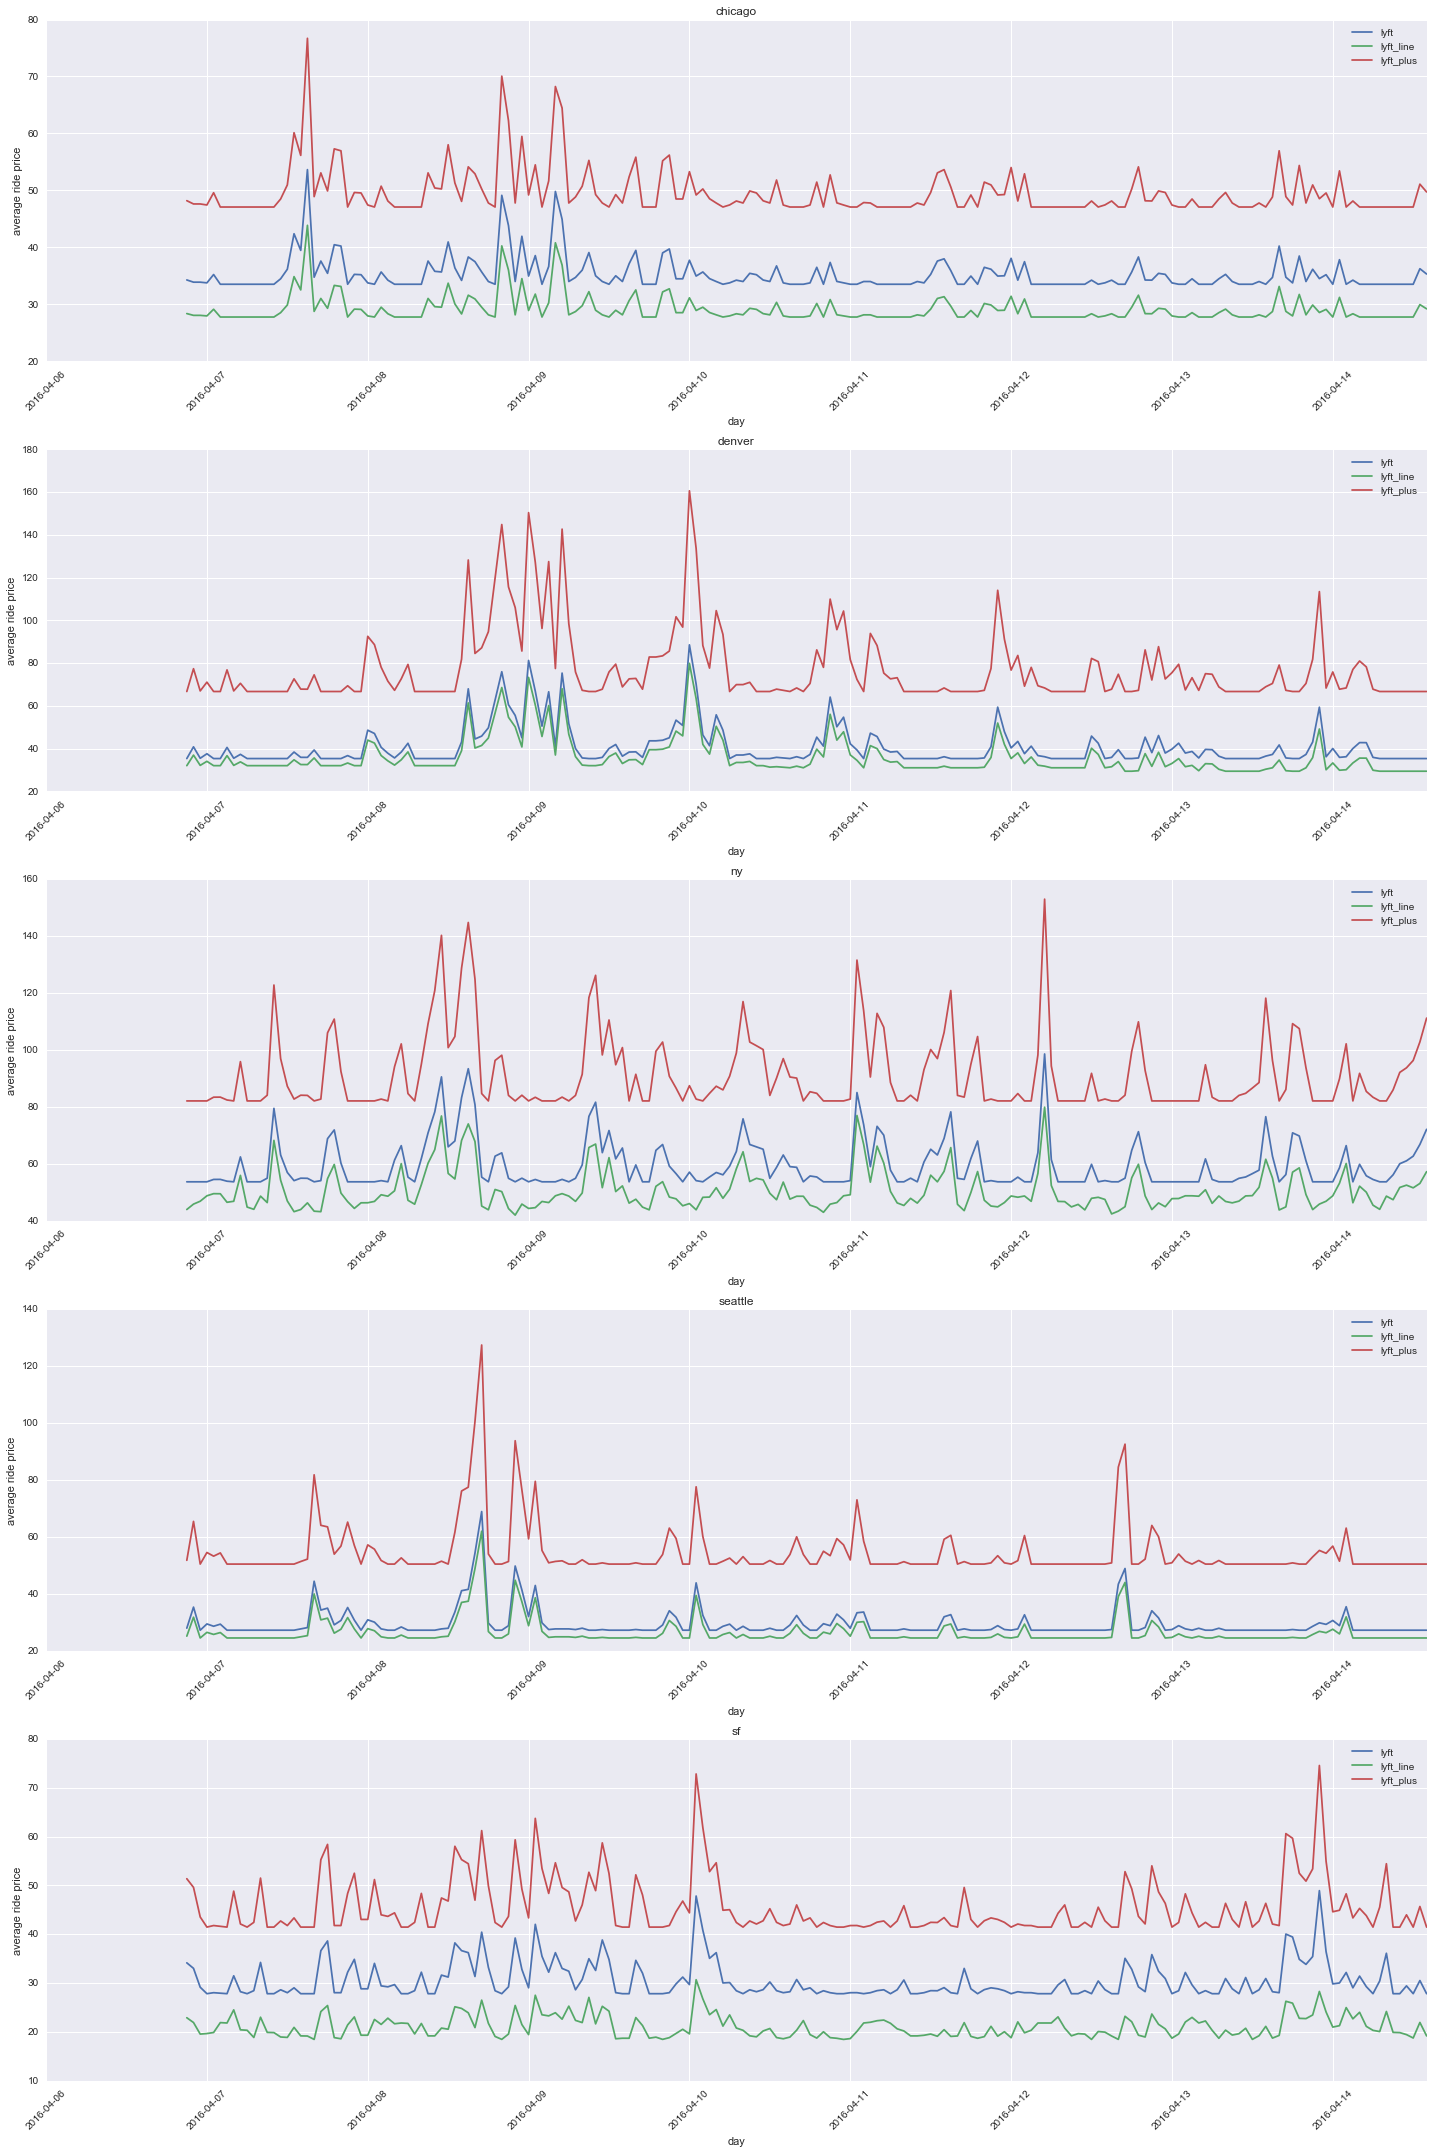

In [25]:
cities = lyft['city'].unique().tolist()
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))
d = lyft.query("ride_type == 'lyft_line' and city == 'denver'")['avg_est_price']
dates = np.unique(d.index.date)
for i, axs in enumerate(ax.reshape(5,)):
    for ridetype in ridetypes:
        data = lyft.query("ride_type == @ridetype and city == @cities[@i]")['avg_est_price']
        axs.plot(data, label=ridetype)
    axs.set_title(cities[i])
    axs.set_ylabel('average ride price')
    axs.set_xlabel('day')
    axs.set_xticks(dates)
    axs.set_xticklabels(dates, rotation='45')
    axs.legend(loc='upper right')
plt.tight_layout()

In [26]:
start_date = str(lyft.index[0])
end_date = str(lyft.index[-1])
ly = lyft.ix[start_date:end_date]
ub = uber.ix[start_date:end_date]

In [27]:
a = np.array([True,False,True,False])
np.insert(a, 1, False)

array([ True, False, False,  True, False], dtype=bool)

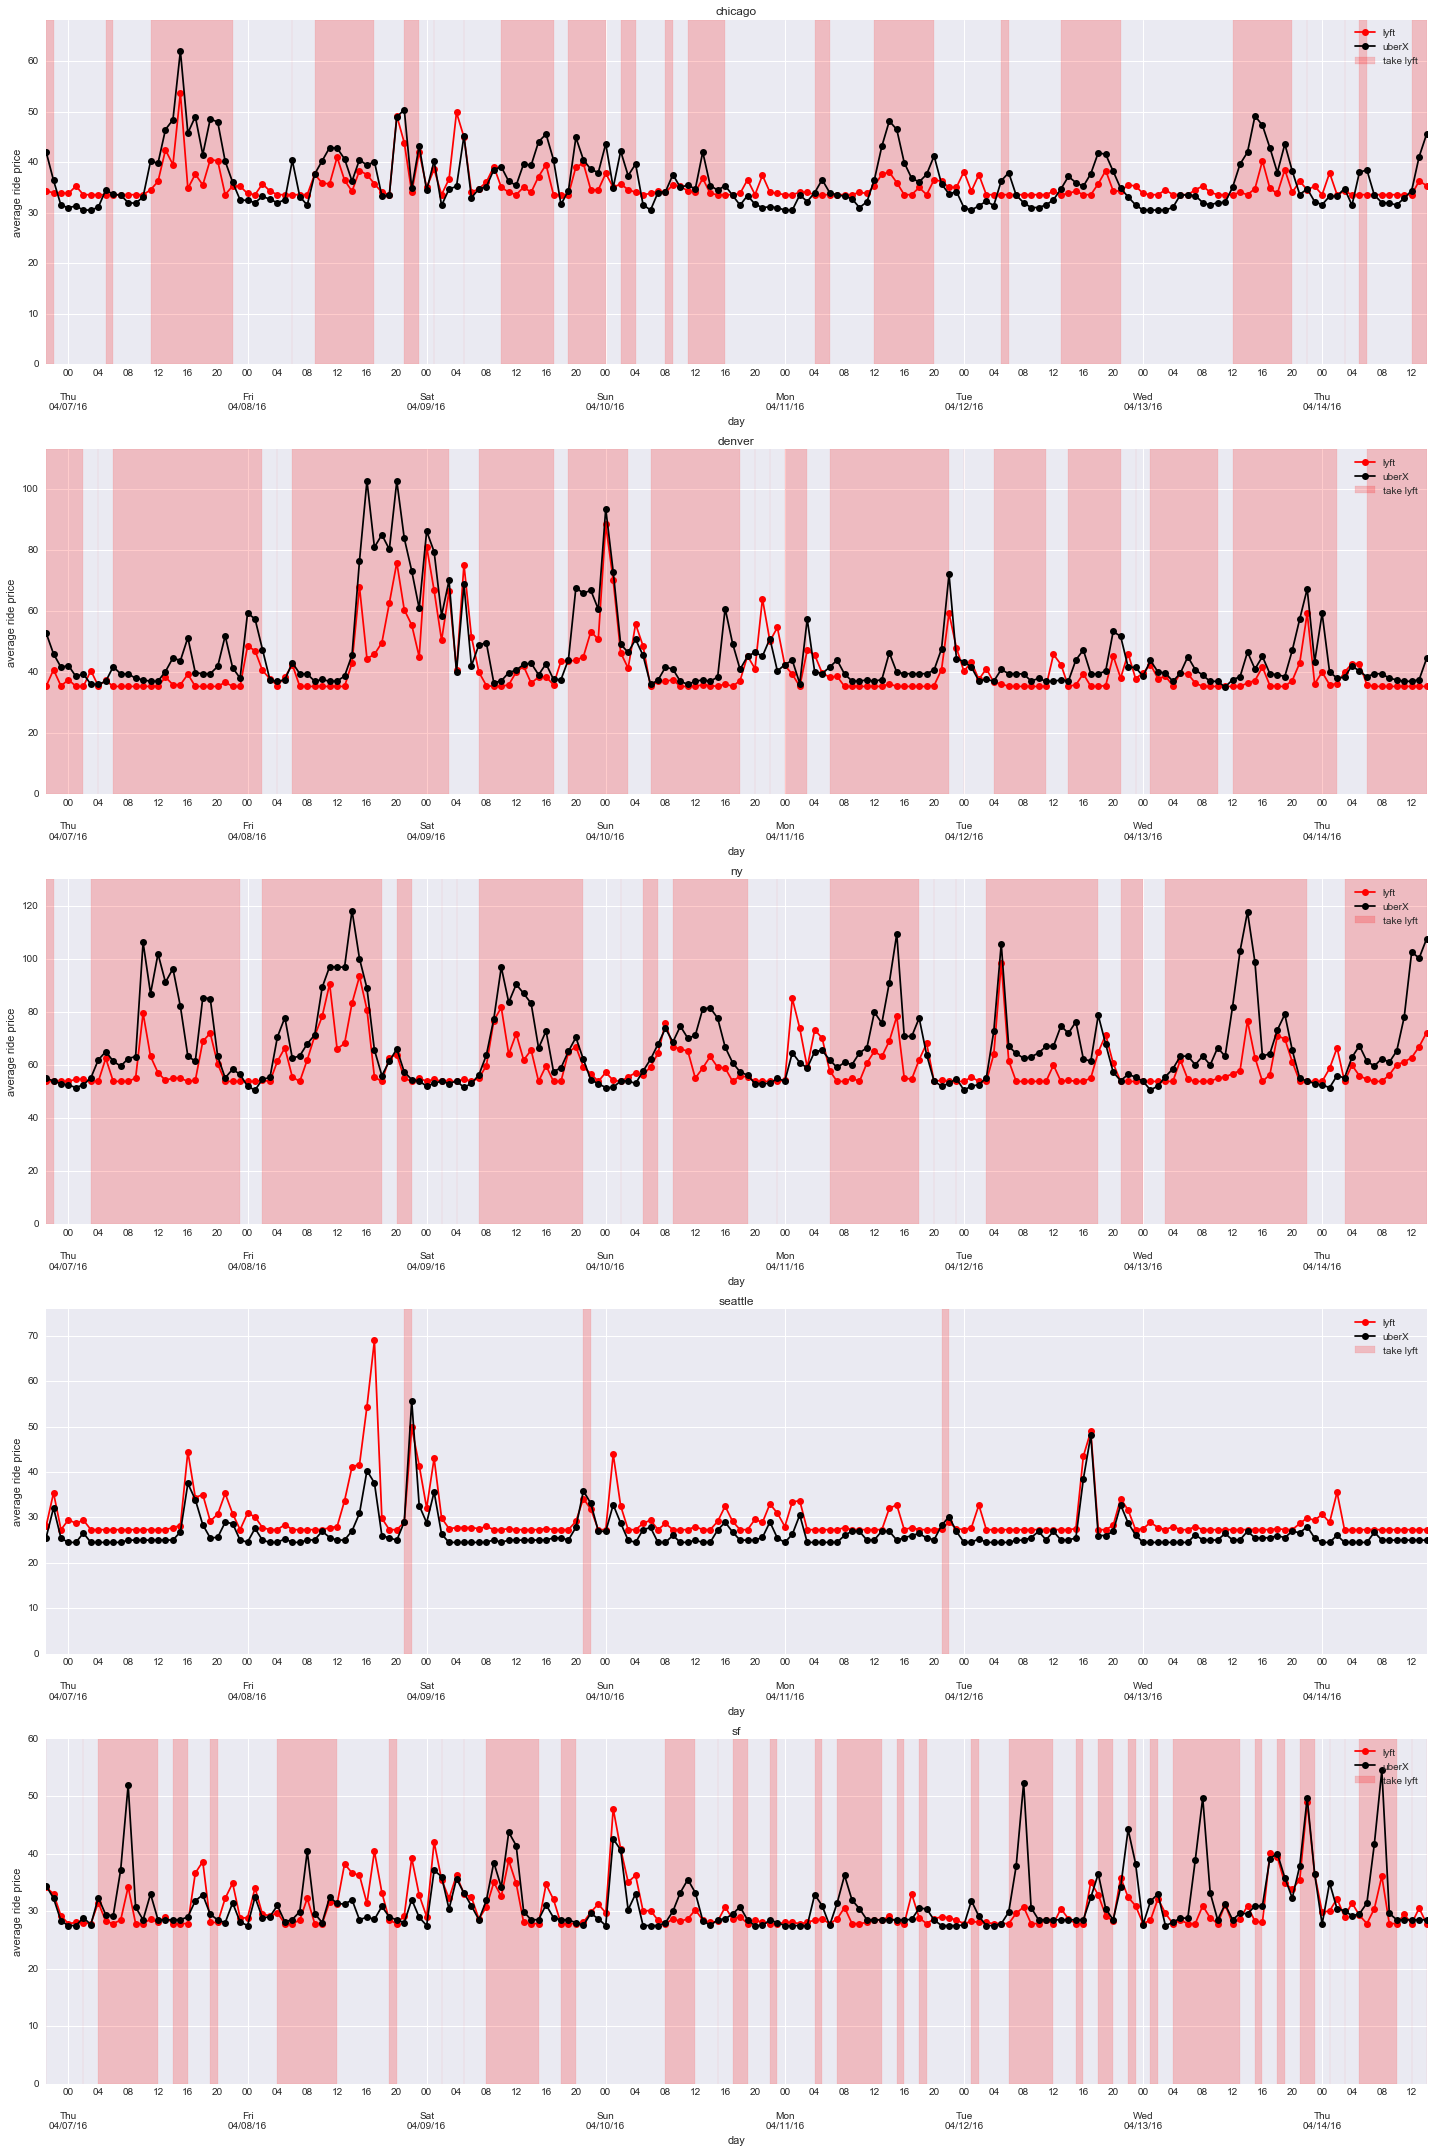

In [47]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

cities = ly['city'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))

ly_d = ly.query("ride_type == 'lyft' and city == 'denver'")['avg_est_price']
ub_d = ub.query("display_name == 'uberX' and city == 'denver'")['avg_price_est']

dates = np.unique(ly_d.index.date)
for i, axs in enumerate(ax.reshape(5,)):
#     axs.set_axis_bgcolor('lightgray')
    ly_data = ly.query("ride_type == 'lyft' and city == @cities[@i]")['avg_est_price']
    axs.plot_date(ly_data.index.to_pydatetime(), ly_data.values, 'o-', label='lyft', color='r')

    ub_data = ub.query("display_name == 'uberX' and city == @cities[@i]")['avg_price_est']
    axs.plot_date(ub_data.index.to_pydatetime(), ub_data.values, 'o-', label='uberX', color='k')
    
    maxy = max([ly_data.max()*1.1,ub_data.max()*1.1])
    diff = ub_data - ly_data
    axs.fill_between(ly_data.index, 0, maxy, where=diff >= 0.0 , alpha=0.2, label='take lyft', color='r')
#     axs.fill_between(ub_data.index, 0, maxs, where=diff < 0.0, alpha=0.2, label='take uber', color='k')
    
    axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=4))
    axs.xaxis.set_minor_formatter(DateFormatter('%H'))
    axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
    axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
    axs.set_title(cities[i])
    axs.set_ylabel('average ride price')
    axs.set_xlabel('day')
    axs.legend(loc='upper right')
#     axs.grid([])
    axs.set_ylim([0,maxy])
    
plt.tight_layout()

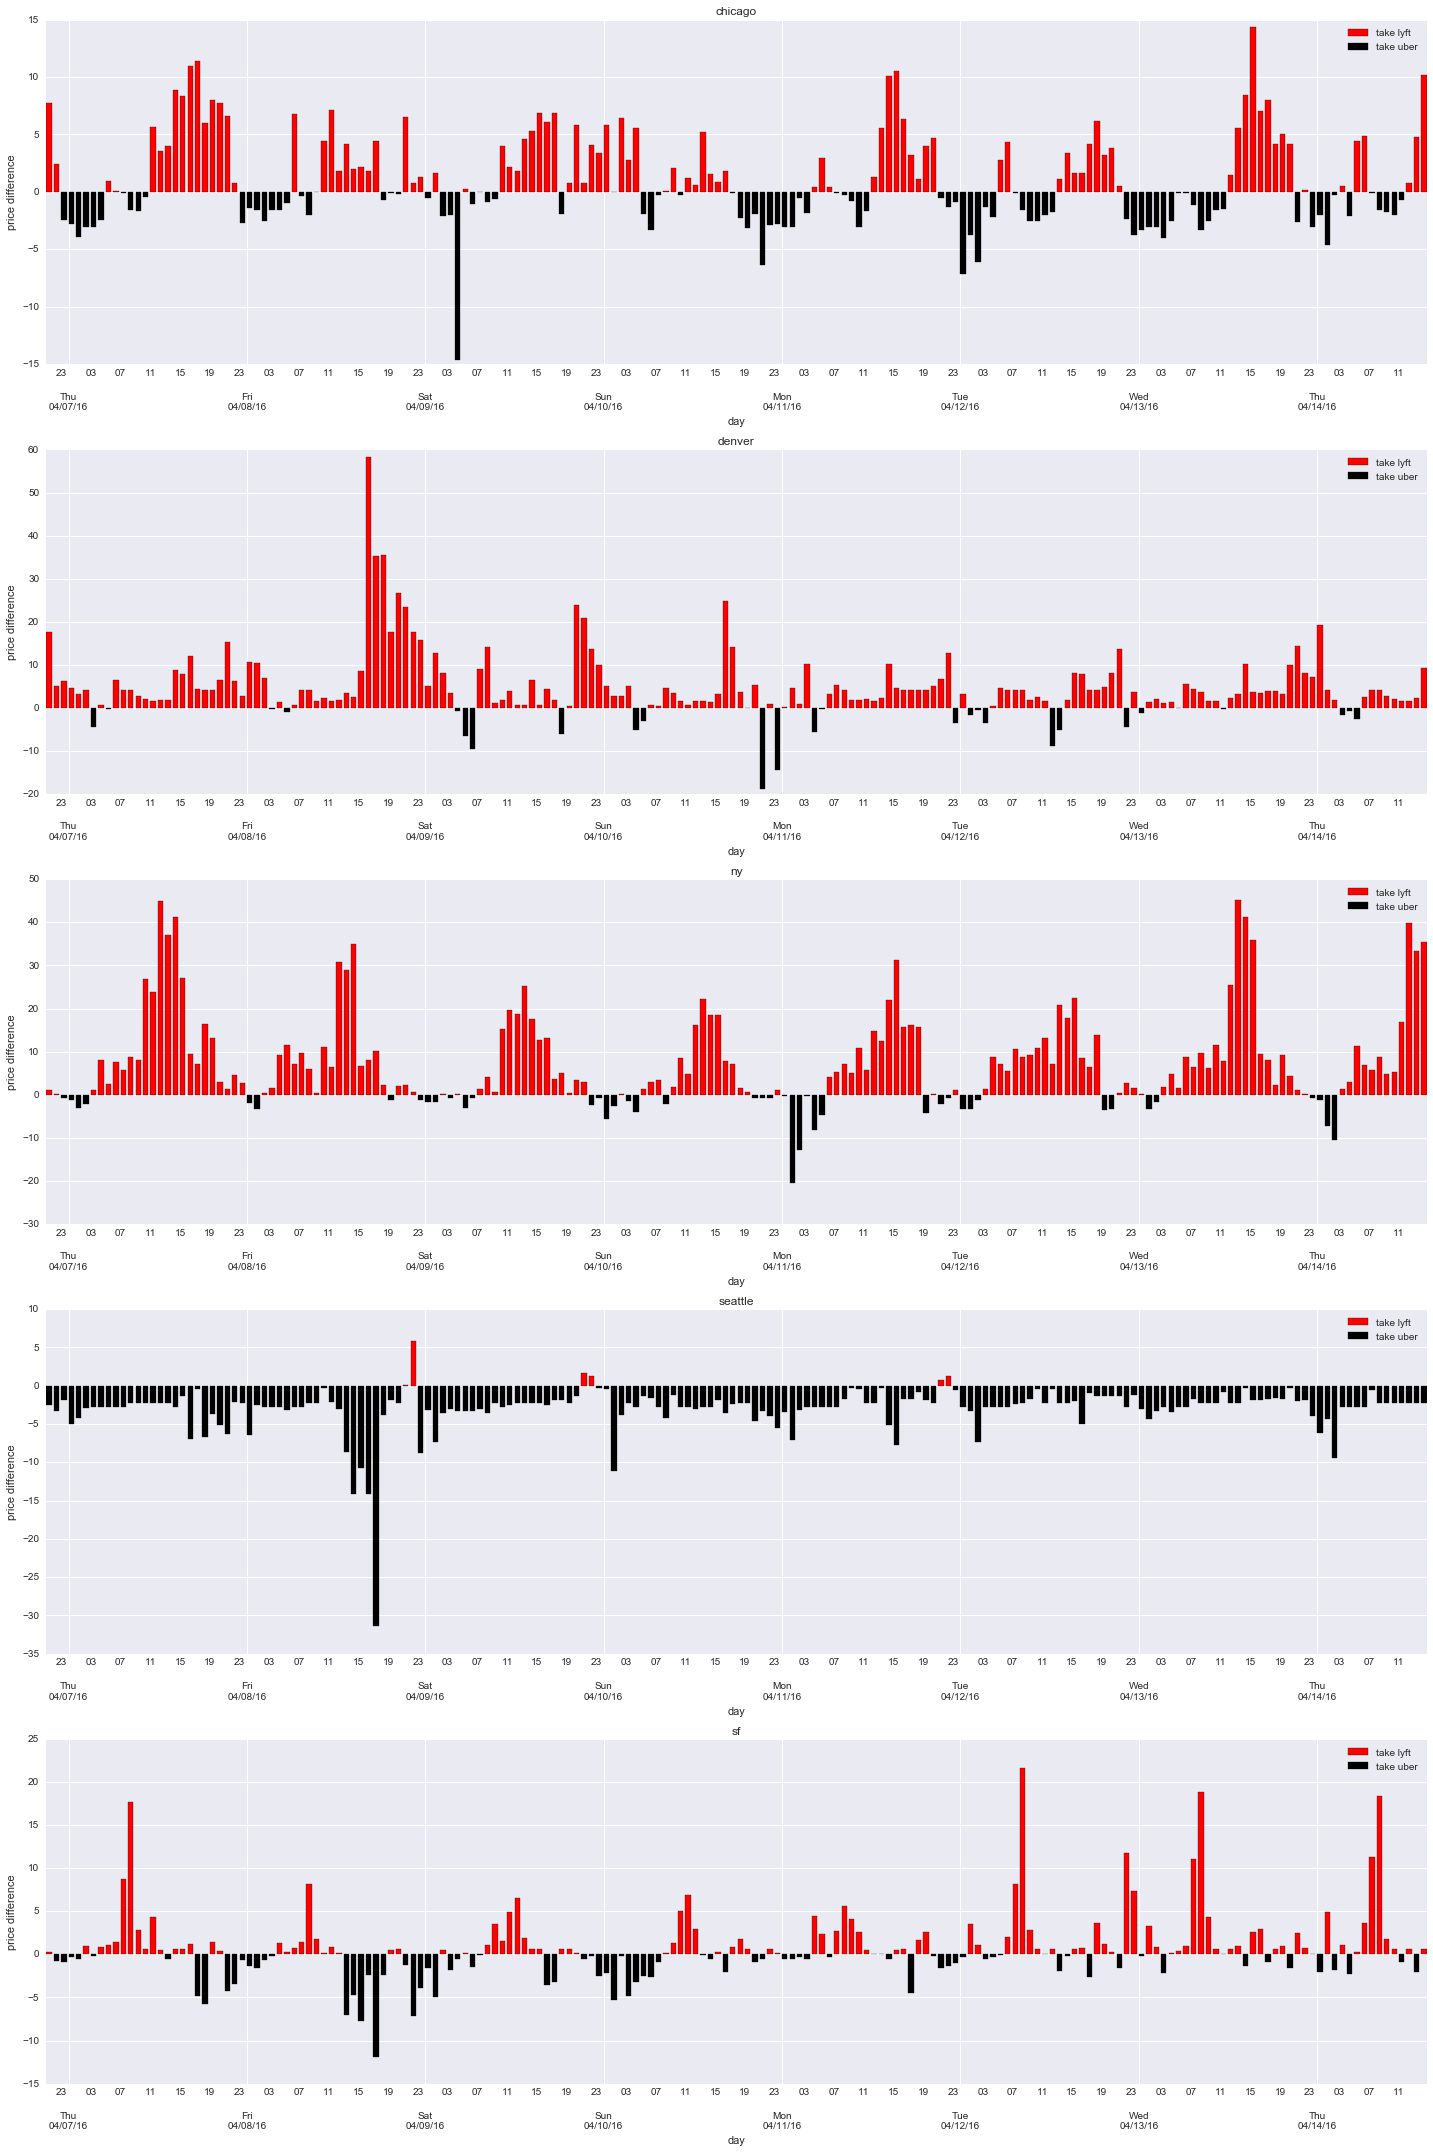

In [83]:
### make a histogram of price differences
cities = ly['city'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))

for i, axs in enumerate(ax.reshape(5,)):
    ly_data = ly.query("ride_type == 'lyft' and city == @cities[@i]")['avg_est_price']
    ub_data = ub.query("display_name == 'uberX' and city == @cities[@i]")['avg_price_est']
    diff = ub_data - ly_data
    pos = diff > 0.0
    neg = diff < 0.0
    axs.bar(diff[pos].index.to_pydatetime(), diff[pos].values, width=0.03, color='r', label="take lyft")
    axs.bar(diff[neg].index.to_pydatetime(), diff[neg].values, width=0.03, color='k', label="take uber")
    axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=4))
    axs.xaxis.set_minor_formatter(DateFormatter('%H'))
    axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
    axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
    axs.set_title(cities[i])
    axs.set_ylabel('price difference')
    axs.set_xlabel('day')
    axs.legend(loc='upper right')
plt.tight_layout()